In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
df_kapp = pd.read_excel('../analyze_kapp/input/kapp_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()

casesC = pd.read_csv('../analyze_kapp/input/data_list_clim.txt', sep='\t')
casesC = casesC.data_id.to_list()

casesN = pd.read_csv('../analyze_kapp/input/data_list_nlim.txt', sep='\t')
casesN = casesN.data_id.to_list()

df_glc = pd.read_excel('./glucose_uptake_N_and_C.xlsx')
df_glc.index = df_glc.data_id.to_list()

In [3]:
clim_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesC]
for case in casesC:
    df.loc[:,case] = df.loc[:,case] / df_glc.glucose_uptake[case]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        clim_0[i] = np.median(vals)
    
nlim_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesN]
for case in casesN:
    df.loc[:,case] = df.loc[:,case] / df_glc.glucose_uptake[case]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        nlim_0[i] = np.median(vals)

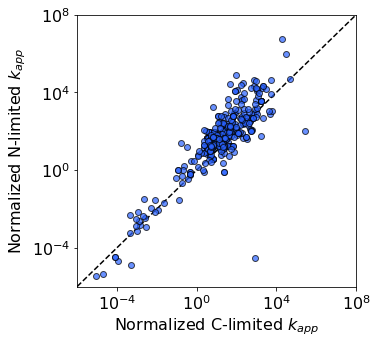

In [6]:
idx = sorted(list(set(clim_0.index) & set(nlim_0.index)))
clim = np.log10(clim_0[idx])
nlim = np.log10(nlim_0[idx])

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(clim, nlim, color='#2962ff', edgecolor='k', alpha=0.7, zorder=1);

lims = [-6,8]
ticks = [-4, 0, 4, 8]
ticklabels = ['$10^{' + str(i) + '}$' for i in ticks]
ax.set_xlim(lims);
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, fontsize=16)
ax.set_ylim(lims);
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels, fontsize=16)

line = mlines.Line2D([-6, 8], [-6, 8], color='k', linestyle='--', zorder=0)
ax.add_line(line);

ax.set_xlabel('Normalized C-limited $k_{app}$', fontsize=16);
ax.set_ylabel('Normalized N-limited $k_{app}$', fontsize=16);

#plt.savefig('./figures/kapp_all_Nlim_vs_Clim_scatter.png', transparent=True, bbox_inches='tight')

In [4]:
df_glc.head()

,tag,data_id,growth_rate,alias,glucose_uptake,non_metabolic_enzyme_fraction
Lahtvee2017_chemoRef,C,Lahtvee2017_chemoRef,0.1000,A07,1.2305,0.5616
Bjorkeroth2020_batchYNB,C,Bjorkeroth2020_batchYNB,0.4236,B01,12.5246,0.3645
Bjorkeroth2020_batchYNBAA,C,Bjorkeroth2020_batchYNBAA,0.4953,B02,12.9700,0.4118
Yu2020_chemoClim,C,Yu2020_chemoClim,0.2000,C01,2.4390,0.3285
Yu2021_chemoClimNH4_010,C,Yu2021_chemoClimNH4_010,0.1000,D04,1.2540,0.3148


In [6]:
df_kapp.head()

,id,subsystem_group1,subsystem_group2,subsystem,Lahtvee2017_chemoEtoh1,Lahtvee2017_chemoEtoh2,Lahtvee2017_chemoEtoh3,Lahtvee2017_chemoNaCl1,Lahtvee2017_chemoNaCl2,Lahtvee2017_chemoNaCl3,...,Elsemman2022_batchGlcCyHx1,Elsemman2022_batchGlcCyHx2,Elsemman2022_batchGlcCyHx3,Elsemman2022_batchGlcCyHx4,Elsemman2022_batchMalt,Elsemman2022_batchTre,Elsemman2022_chemoGlc020,Elsemman2022_chemoGlc023,Elsemman2022_chemoGlc027,Elsemman2022_chemoGlc030
ACS_c_FWD,ACS_c_FWD,Central metabolism,Glycolytic pathways,Acetyl-CoA synthesis,581.546745,155.464383,206.466839,183.578668,181.016913,161.166086,...,273.803785,125.837067,62.718268,45.212672,93.262013,326.476485,37.278497,35.372124,43.132070,49.690558
PDH_m_FWD,PDH_m_FWD,Central metabolism,Glycolytic pathways,Acetyl-CoA synthesis,NaN,1351.008584,1296.640283,2401.121607,2521.155774,2597.605010,...,12158.808001,3336.741532,2347.627926,2063.428724,3994.056920,39692.560173,5029.558136,4087.467994,4076.550283,4224.447153
PC_c_FWD,PC_c_FWD,Central metabolism,Glycolytic pathways,Acetyl-CoA synthesis,NaN,821.837004,854.516500,2010.618415,1874.519547,1692.268340,...,1026.000488,691.644674,457.577479,415.786994,422.809862,2197.175380,812.264882,725.367132,562.358237,478.670625
ALATA_L_m_REV,ALATA_L_m_REV,Amino acid metabolism,Ala/Iso/Leu/Val pathways,Alanine biosynthesis,1279.758123,1157.990605,1829.281793,1565.766065,1642.491613,1613.167127,...,4204.449804,2689.935288,1271.591696,1244.079768,1097.935443,2670.885626,395.312504,346.302818,361.935619,892.347881
AGTi_c_FWD,AGTi_c_FWD,Amino acid metabolism,Ala/Iso/Leu/Val pathways,Alanine metabolism,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
clim_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesC]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        clim_0[i] = np.median(vals)
        
nlim_0 = pd.core.series.Series(dtype='float64')
df = df_kapp.loc[:, casesN]
for i in df.index:
    vals = [v for v in df.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        nlim_0[i] = np.median(vals)